# <center>Итоговый проект первого года обучения Skillfactory Data Science

# <center>Определение уязвимых групп населения

## <center> 5. Анализ результатов и описание кластеров

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stats
from sklearn.preprocessing import RobustScaler
from sklearn import cluster, metrics
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
import pickle
from sklearn.pipeline import Pipeline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv(
    'social_russia_data/clusters.csv', index_col='region')
display(df.head())

,child_mortality_percent,general_morbidity,congenital_malformation,psychosis,teenage_pregnancy,poverty_percent,welfare_expense_share,real_incomes,real_pay,living area,...,population,grp,reg_prod_total,retail,newborn_per_population,disabled_percent,all crimes,alco,drug,cluster
region,,,,,,,,,,,,,,,,,,,,,
Алтайский край,0.395807,112764.7,5.303802,1272.1,1.458615,17.5,29.7,4.569543,103.8,2.944439,...,14.655850,12.581621,5.910482,11.942146,0.621701,1.294413,9.698184,88.1,2.912351,1
Амурская область,0.428418,83412.0,5.916472,446.7,1.686399,15.2,21.7,4.618086,105.2,2.906901,...,13.579845,13.255780,6.240458,12.409968,0.690140,1.428663,8.769196,113.3,3.234749,1
Архангельская область без Ненецкого АО,0.281883,99842.1,6.131009,685.3,2.694627,12.3,21.4,4.599152,102.9,2.884801,...,13.903911,13.150370,6.411688,12.429352,0.596224,1.244184,8.870803,64.7,2.322388,1
Астраханская область,0.461571,64679.9,6.030926,624.5,0.000000,15.6,31.4,4.585987,104.5,3.005683,...,13.821277,13.174865,6.581238,12.069840,0.734686,1.079148,8.655040,22.2,0.182322,1
Белгородская область,0.322450,74637.4,4.921440,388.2,0.000000,7.2,16.1,4.596129,104.8,2.933857,...,14.253218,13.379437,7.137797,12.376140,0.586308,1.593168,8.480322,41.3,1.435085,1


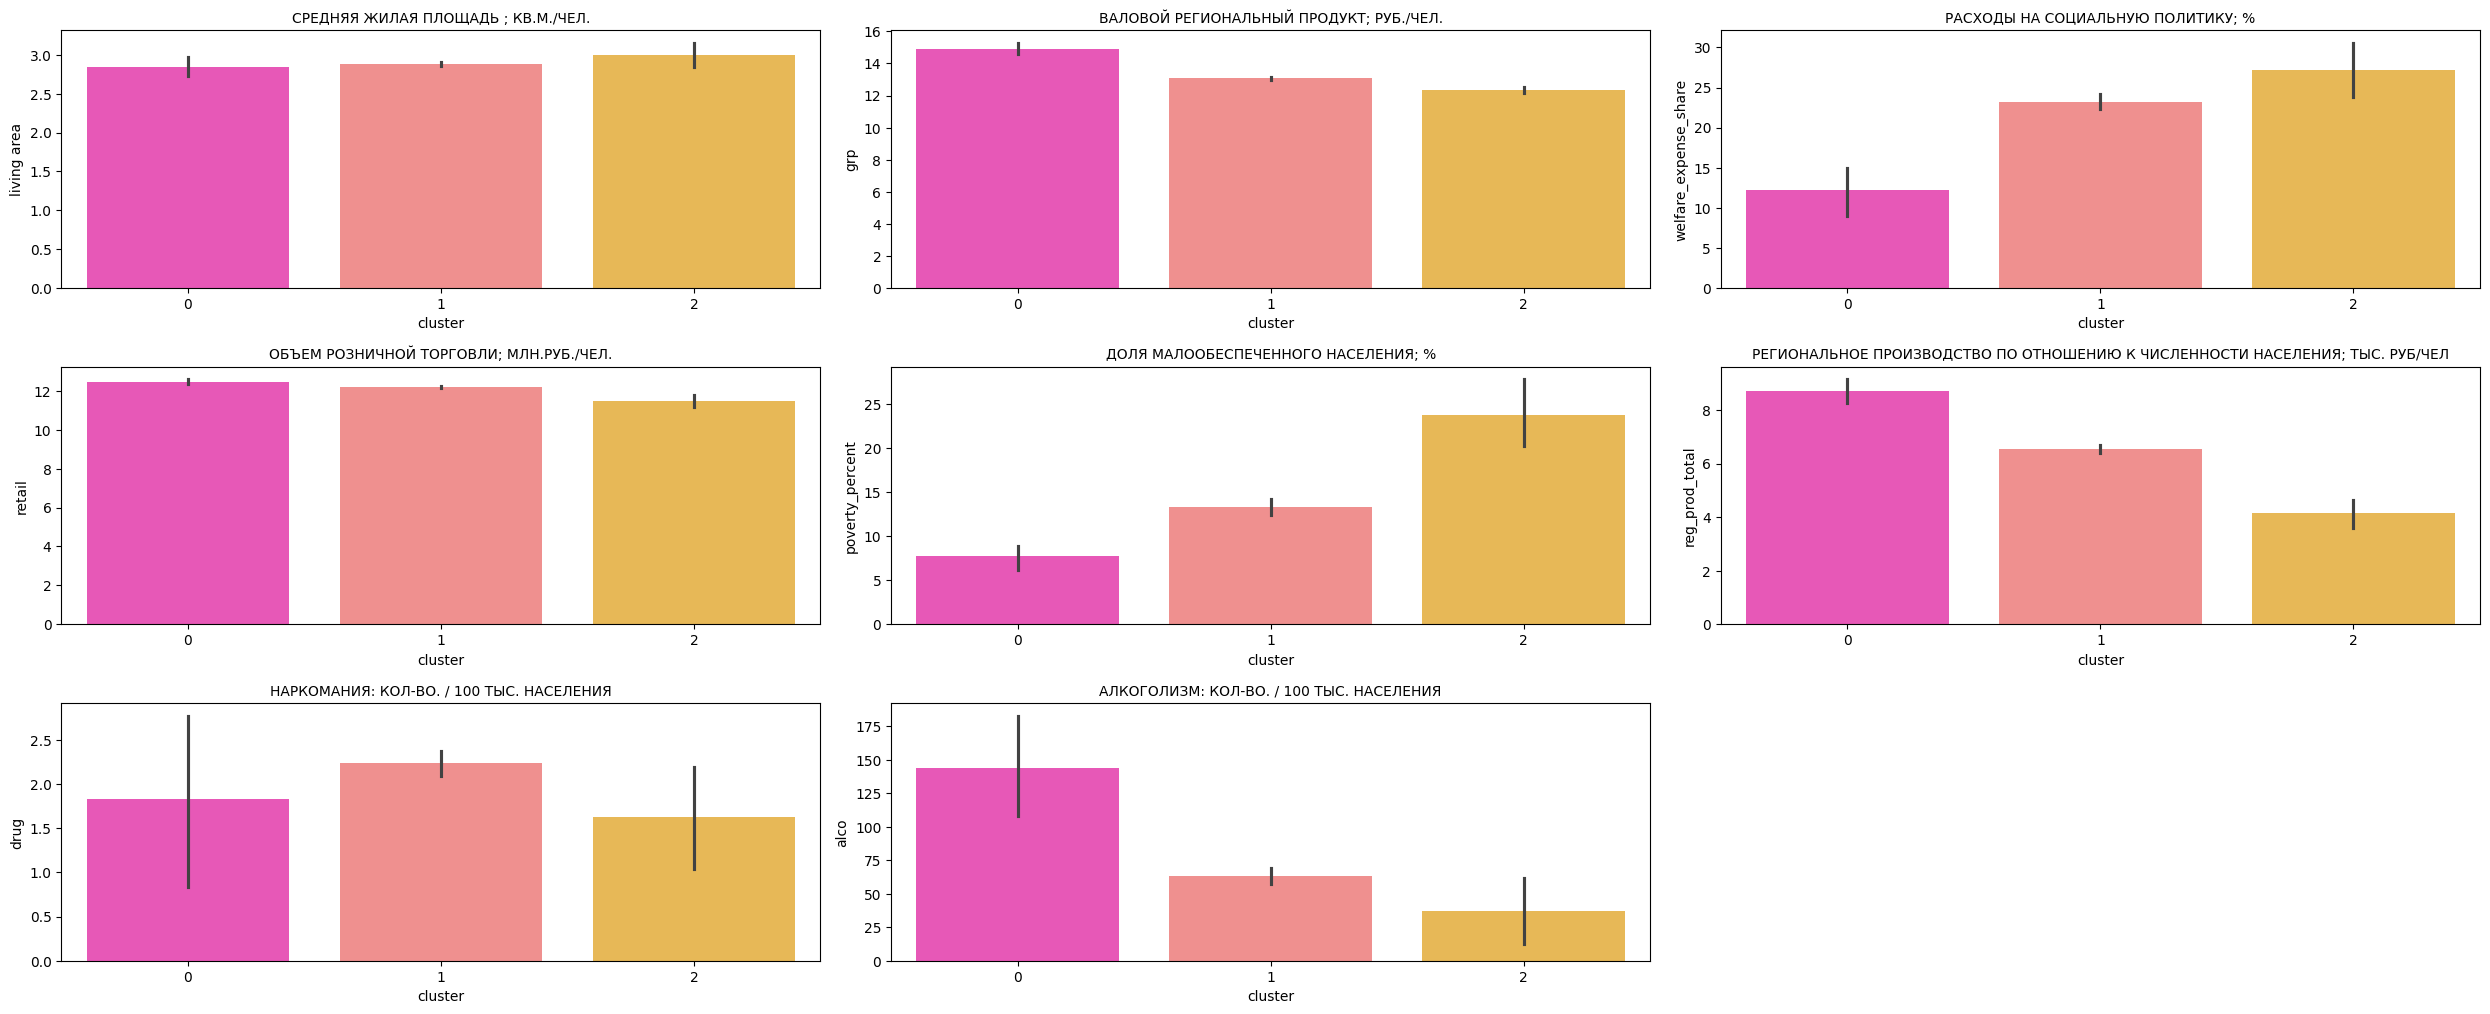

In [5]:
title=['Средняя жилая площадь ; кв.м./чел.',
       'Валовой региональный продукт; руб./чел.',
       'Расходы на социальную политику; %', 'Объем розничной торговли; млн.руб./чел.',
       'Доля малообеспеченного населения; %', 
       'Региональное производство по отношению к численности населения; тыс. руб/чел',
       'Наркомания: кол-во. / 100 тыс. населения',
       'Алкоголизм: кол-во. / 100 тыс. населения'
       ]

cols = df[
    [
        'living area',
        'grp',
        'welfare_expense_share',
        'retail',
        'poverty_percent',
        'reg_prod_total', 'drug', 'alco'       
    ]
].columns.tolist()
plt.figure(figsize=(25, 30))

for i, variable in enumerate(cols):
    plt.subplot(9, 3, i + 1)
    sns.barplot(x=df['cluster'], y=df[variable], palette="spring")
    plt.tight_layout()
    plt.title(title[i].upper(), fontsize = 10)
plt.show()

Проанализировав графики, можно описать кластеры следующим образом:
- **Кластер 0**: субъекты с высоким уровнем. Сюда вошли: Магаданская область, Ненецкий автономный округ, Сахалинская область, Чукотский автономный округ, Ямало-Ненецкий автономный округ. В этих регионах развита добывающая промышленность, в связи с чем ВВП, региональное производство и объем розничной торговли наибольшие. Но, поскольку в этих регионах в основном проживает население с высоким достатком (доля малообеспеченного населения самая низкая), расходы на социальную политику минимальны. При этом средняя жилая площадь наименьшая, что может быть связано с высокой стоимостью жилья в этих регионах.
- **Кластер 1**: субъекты с высоким уровнем. Самый большой по количеству объектов кластер. Все показатели средние.
- **Кластер 2**: субъекты с низким уровнем. Сюда вошли: Карачаево-Черкесская Республика, Республика Алтай, Республика Дагестан, Республика Ингушетия, Республика Калмыкия, Республика Тыва, Чеченская Республика. ВВП, региональное производство и объем розничной торговли наименьшие. Доля малообеспеченного населения наибольшая и, соответственно, наибольшие расходы на социальную политику. Средняя жилая площадь наибольшая, поскольку стоимость жилья в таких регионах невысокая. Именно эти регионы наиболее остро нуждаются в помощи малообеспеченным/неблагополучным слоям населения.